In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
def correlacion_pearson(data_frame, columna1, columna2):
    return np.corrcoef(data_frame[columna1], data_frame[columna2])[0,1];

# Experimentos del TP de TSP
En esta carpeta de Jupyer vamos a poner lo relativo a realizar la experimentación computacional.
- **Asegurarse de correr los experimentos en el notebook Experimentos antes de utilizar este notebook.**
- En este archivo se lee el output de los experimentos y se muestra de manera gráfica esos resultados.

# Datasets
Para los experimentos se crean las siguientes familias de instancias para evaluar los distintos métodos.
1. **completos-random**: Son instancias de grafos completos con n variable y costos de aristas aleatorios.

# Métodos
Los métodos evaluados en este notebook son los siguientes:
- **H1**: Heurística de vecino más cercano.
- **H2**: Heurística de arista más corta.
- **HAGM**: Heurística de AGM.
- **METAH1**: Metaheruística con memoria de soluciones.
- **METAH2**: Metaheurística con memoria de aristas.

# Experimentos
Leemos el dataframe con todos los resultados.

In [208]:
df_resultados = pd.read_csv("resultados/resultados_complejidad.csv");
df_resultados_heuristicas = pd.read_csv("resultados/resultados_heuristicas.csv")
df_parametros = pd.read_csv("resultados/resultados_parametros.csv")
df_resultados.head()

,dataset,n,W,metodo,tiempo
0,completos-random,5,10.0,H1,0.009534
1,completos-random,5,10.0,H2,0.030598
2,completos-random,5,10.0,HAGM,0.005188
3,completos-random,5,10.0,METAH1,11.453200
4,completos-random,5,10.0,METAH2,31.367000


In [209]:
df_resultados_heuristicas.head()

,dataset,n,W,metodo,tiempo,optimo
0,berlin52,52,7542,H1,0.077195,8980.920
1,berlin52,52,7542,H2,0.876176,9954.060
2,berlin52,52,7542,HAGM,0.169939,10403.900
3,eil51,51,426,H1,0.074145,513.610
4,eil51,51,426,H2,0.778665,481.519


In [210]:
df_parametros.head()

,dataset,n,W,metodo,optimo,tiempo,instancia
0,maxiter,10000.0,7542,METAH1,7922.860,2828.52,berlin52
1,maxiter,10000.0,7542,METAH2,7687.960,3147.99,berlin52
2,maxiter,10000.0,426,METAH1,448.266,2403.14,eil51
3,maxiter,10000.0,426,METAH2,448.935,2720.09,eil51
4,maxiter,10000.0,538,METAH1,589.668,6389.14,eil76


## Experimento 1: Complejidad
En este experimento evaluamos las complejidades de cada algoritmo contra instancias de tamaño variable y costos de aristas aleatorios.

Listo


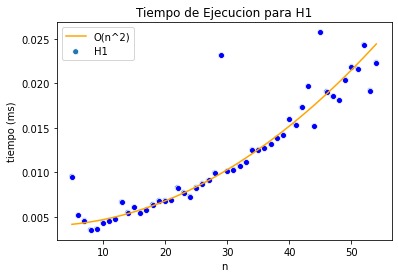

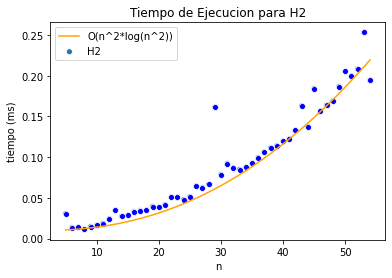

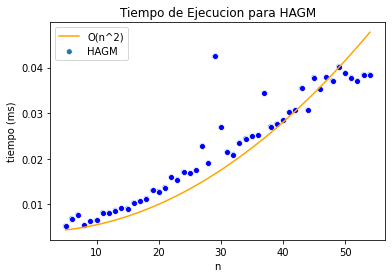

In [243]:
#metodos = ["H1", "H2", "HAGM", "METAH1", "METAH2"]
metodos = ["H1", "H2", "HAGM"]
for metodo in metodos:
    df_complejidad = pd.DataFrame()
    plt.figure(figsize=(6, 4))
    # Graficamos los tiempos de ejecución de cada dataset en función de n.
    df_complejidad = df_resultados[df_resultados["metodo"]==metodo].copy();
    fig = sns.scatterplot(data=df_complejidad, x='n', y='tiempo', hue='dataset');
    plt.title(f'Tiempo de Ejecucion para {metodo}')
    fig.set(xlabel='n', ylabel='tiempo (ms)');
    plt.savefig(F"graficos/{metodo}-complejidad.svg");
    
    # Comparamos contra una función polinómica.
    df_complejidad = df_resultados[(df_resultados["metodo"]==metodo) & (df_resultados["dataset"]=="completos-random")].copy();
    if (metodo == "METAH1" or metodo == "METAH2"):
        coef = 0.00001
        df_complejidad["tiempo_esperado"] = df_complejidad["n"] ** 3 * coef; # n^3
    elif (metodo == "H1"):
        coef = 0.000007
        df_complejidad["tiempo_esperado"] = df_complejidad["n"] ** 2 * coef + 0.004; # n^2
    elif (metodo == "H2"):
        coef = 0.000009
        df_complejidad["tiempo_esperado"] = (df_complejidad["n"] ** 2 * np.log(df_complejidad["n"]**2) * coef + 0.01); # n^2*log(n^2)
    elif (metodo == "HAGM"):
        coef = 0.000015
        df_complejidad["tiempo_esperado"] = df_complejidad["n"] ** 2 * coef + 0.004; # n^2
    
    fig = sns.scatterplot(data=df_complejidad, x='n', y='tiempo', color="blue");
    fig = sns.lineplot(data=df_complejidad, x='n', y='tiempo_esperado', color="orange");

    if (metodo == "H2"):
        fig.legend(labels=['O(n^2*log(n^2))', metodo]); 
    else:
        fig.legend(labels=['O(n^2)', metodo]);
    fig.set(xlabel='n', ylabel='tiempo (ms)');
    plt.savefig(F"graficos/{metodo}-complejidad-2.svg")

print("Listo")

Índice de correlación de Pearson de H1: 0.9190365489457346
Índice de correlación de Pearson de H2: 0.9674573592490477
Índice de correlación de Pearson de HAGM: 0.9278979510256615
Listo


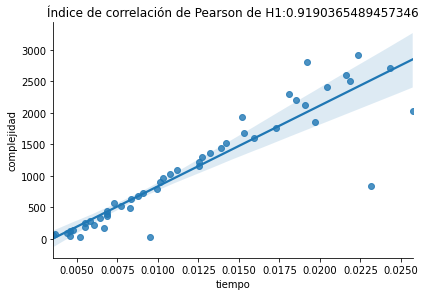

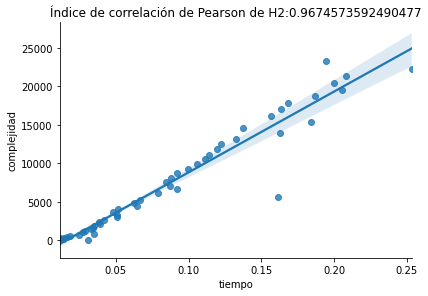

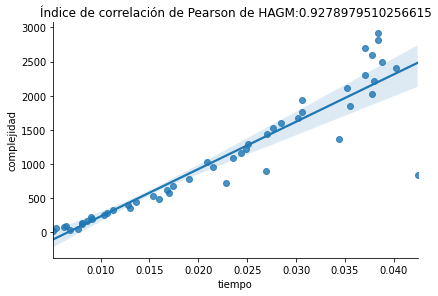

In [267]:
#metodos = ["H1", "H2", "HAGM", "METAH1", "METAH2"]
metodos = ["H1", "H2", "HAGM"]
for metodo in metodos:
    df_complejidad = pd.DataFrame()
    # Graficamos la correlación de Pearson
    df_complejidad = df_resultados[(df_resultados["metodo"]==metodo) & (df_resultados["dataset"]=="completos-random")].copy();
    if (metodo == "H2"):
        df_complejidad["complejidad"] = df_complejidad["n"] ** 2 * np.log(df_complejidad["n"]**2);
    else:
        df_complejidad["complejidad"] = df_complejidad["n"] ** 2;
    indice = correlacion_pearson(df_complejidad, "tiempo", "complejidad")

    fig = sns.lmplot(data=df_complejidad, x="tiempo", y="complejidad",height=4, aspect=1.5);
    plt.title(f"Índice de correlación de Pearson de {metodo}:{indice}")
    plt.savefig(F"graficos/{metodo}-correlacion.svg");
    print(F"Índice de correlación de Pearson de {metodo}:", correlacion_pearson(df_complejidad, "tiempo", "complejidad"));
    

print("Listo")

## Experimento 3: Comparación de heurísticas

### Comparación de tiempo entre instancias

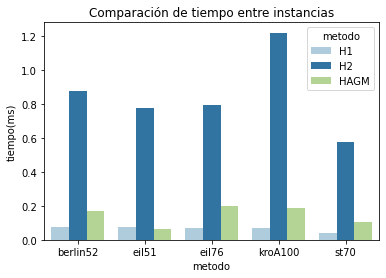

In [212]:
df_heur_tiempo = df_resultados_heuristicas.copy();
plt.title('Comparación de tiempo entre instancias')
fig = sns.barplot(data=df_heur_tiempo, x='dataset', y = 'tiempo', hue = 'metodo', palette ='Paired')
fig.set(xlabel='metodo', ylabel='tiempo(ms)');
plt.savefig("graficos/heur-tiempo.png");

### Comparación de gap entre instancias

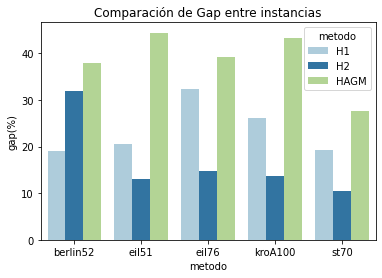

In [213]:
df_heur_gap = df_resultados_heuristicas.copy();
df_heur_gap['gap'] = ((df_heur_gap['optimo']-df_heur_gap['W']) / df_heur_gap['W']) * 100
plt.title('Comparación de Gap entre instancias')
fig = sns.barplot(data=df_heur_gap, x='dataset', y = 'gap', hue = 'metodo', palette = 'Paired')
fig.set(xlabel='metodo', ylabel='gap(%)');
#fig.set_ylim(100,150);
plt.savefig("graficos/heur-gap.");

## Experimento 4: Comparacion de Parametros

In [214]:
df_parametros = df_parametros.copy();
df_parametros['gap'] = ((df_parametros['optimo']-df_parametros['W']) / df_parametros['W']) * 100
display(
    df_parametros[(df_parametros['instancia']=='berlin52') & (df_parametros['dataset']=='maxiter') & (df_parametros['metodo']=='METAH1')]
    )

,dataset,n,W,metodo,optimo,tiempo,instancia,gap
0,maxiter,10000.0,7542,METAH1,7922.86,2828.52,berlin52,5.049854
10,maxiter,20000.0,7542,METAH1,7942.12,2524.21,berlin52,5.305224
20,maxiter,30000.0,7542,METAH1,8128.48,2484.12,berlin52,7.776187
30,maxiter,40000.0,7542,METAH1,8065.83,2496.89,berlin52,6.945505
40,maxiter,50000.0,7542,METAH1,8292.46,2506.39,berlin52,9.950411
...,...,...,...,...,...,...,...,...
950,maxiter,960000.0,7542,METAH1,8220.75,2475.25,berlin52,8.999602
960,maxiter,970000.0,7542,METAH1,7801.63,2487.75,berlin52,3.442456
970,maxiter,980000.0,7542,METAH1,7544.37,2465.71,berlin52,0.031424
980,maxiter,990000.0,7542,METAH1,8148.09,2475.66,berlin52,8.036197


### Máximas iteraciones sin mejoras
Evaluamos un rango de iteraciones desde 1000 a 100000, manteniendo los otros parámetros en los valores predeterminados mencionados anteriormente.

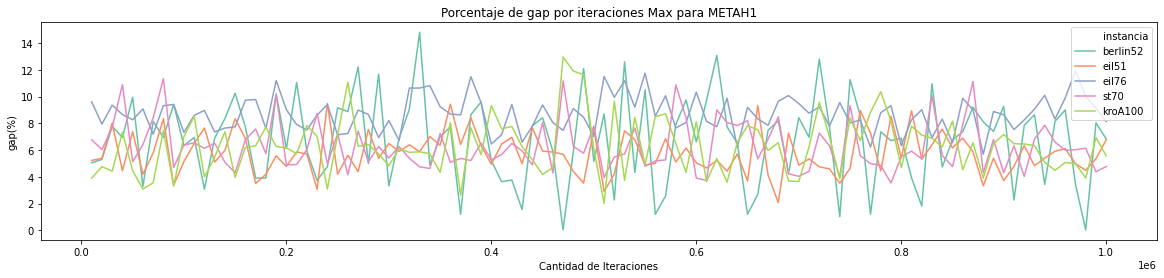

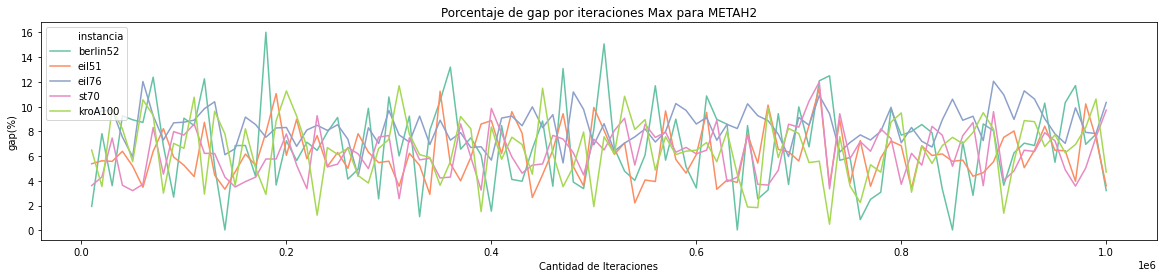

In [215]:
df_maxiter = df_parametros[df_parametros["dataset"]=="maxiter"]
#display(df_maxiter)
for m in df_maxiter['metodo'].unique().tolist():
    plt.figure(figsize=(20, 4))
    fig = sns.lineplot(x="n", y="gap", hue="instancia", 
                        palette='Set2',
                        data=df_maxiter[df_parametros["metodo"]==f'{m}'])
    fig.set(xlabel='Cantidad de Iteraciones', ylabel='gap(%)');
    #fig._legend.set_title("")
    plt.title(f'Porcentaje de gap por iteraciones Max para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/max-iter-gap-{m}.png');

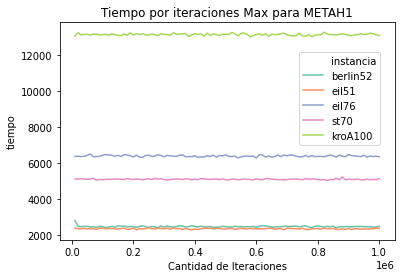

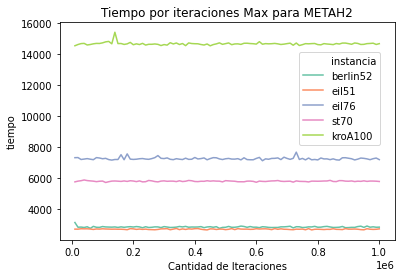

In [216]:
df_maxiter = df_parametros[df_parametros["dataset"]=="maxiter"]
#display(df_maxiter)
for m in df_maxiter['metodo'].unique().tolist():
    plt.figure(); 
    fig = sns.lineplot(x="n", y="tiempo", hue="instancia", 
                        palette='Set2',
                        data=df_maxiter[df_parametros["metodo"]==f'{m}'])
    fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.65), ncol=1)
    fig.set(xlabel='Cantidad de Iteraciones', ylabel='tiempo');
    #fig._legend.set_title("")
    plt.title(f'Tiempo por iteraciones Max para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/max-iter-tiempo-{m}.png');

,dataset,n,W,metodo,optimo,tiempo,instancia,gap
0,maxiter,10000.0,7542,METAH1,7922.860,2828.52,berlin52,5.049854
1,maxiter,10000.0,7542,METAH2,7687.960,3147.99,berlin52,1.935296
2,maxiter,10000.0,426,METAH1,448.266,2403.14,eil51,5.226761
3,maxiter,10000.0,426,METAH2,448.935,2720.09,eil51,5.383803
10,maxiter,20000.0,7542,METAH1,7942.120,2524.21,berlin52,5.305224
...,...,...,...,...,...,...,...,...
983,maxiter,990000.0,426,METAH2,457.706,2711.19,eil51,7.442723
990,maxiter,1000000.0,7542,METAH1,8057.020,2509.64,berlin52,6.828693
991,maxiter,1000000.0,7542,METAH2,7784.550,2848.64,berlin52,3.215990
992,maxiter,1000000.0,426,METAH1,454.848,2391.37,eil51,6.771831


<Figure size 432x288 with 0 Axes>

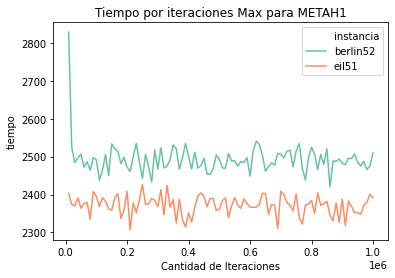

<Figure size 432x288 with 0 Axes>

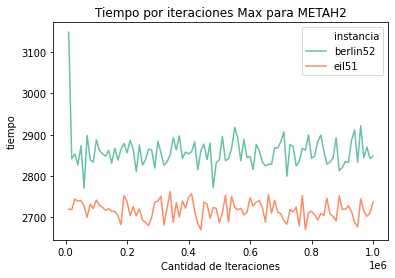

In [217]:
df_maxiter = df_parametros[(df_parametros["dataset"]=="maxiter") & ((df_parametros["instancia"]=="berlin52") | (df_parametros["instancia"]=="eil51"))]
display(df_maxiter)
for m in df_maxiter['metodo'].unique().tolist():
    plt.figure(); plt.figure();
    fig = sns.lineplot(x="n", y="tiempo", hue="instancia", 
                        palette='Set2',
                        data=df_maxiter[df_parametros["metodo"]==f'{m}'])
    fig.set(xlabel='Cantidad de Iteraciones', ylabel='tiempo');
    #fig._legend.set_title("")
    plt.title(f'Tiempo por iteraciones Max para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/max-iter-tiempo-{m}.png');

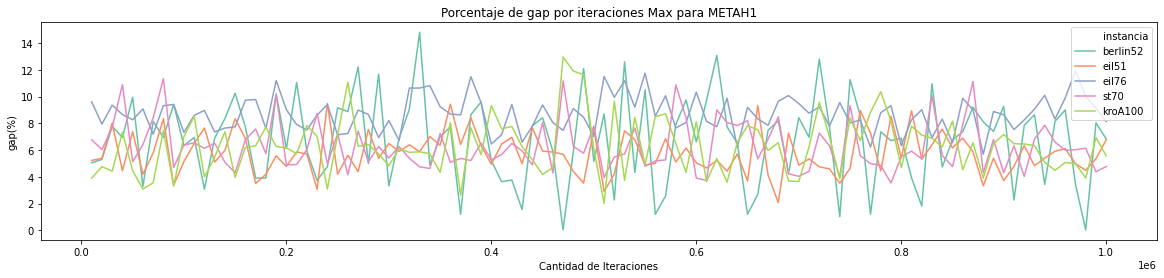

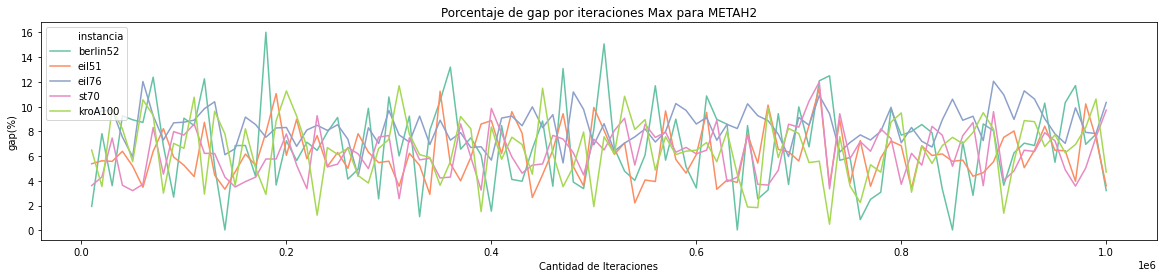

In [218]:
df_ = df_parametros[df_parametros["dataset"]=="maxiter"]
#display(df_)
for m in df_['metodo'].unique().tolist():
    plt.figure(figsize=(20, 4))
    fig = sns.lineplot(x="n", y="gap", hue="instancia", 
                        palette='Set2',
                        data=df_[df_parametros["metodo"]==f'{m}'])
    fig.set(xlabel='Cantidad de Iteraciones', ylabel='gap(%)');
    #fig._legend.set_title("")
    plt.title(f'Porcentaje de gap por iteraciones Max para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/max-iter-gap-{m}.png');

## Maximas iteraciones sin mejoras   
Evaluamos un rango de iteraciones desde 1000 a 100000, manteniendo los otros par ́ametros enlos valores predeterminados mencionados anteriormente.

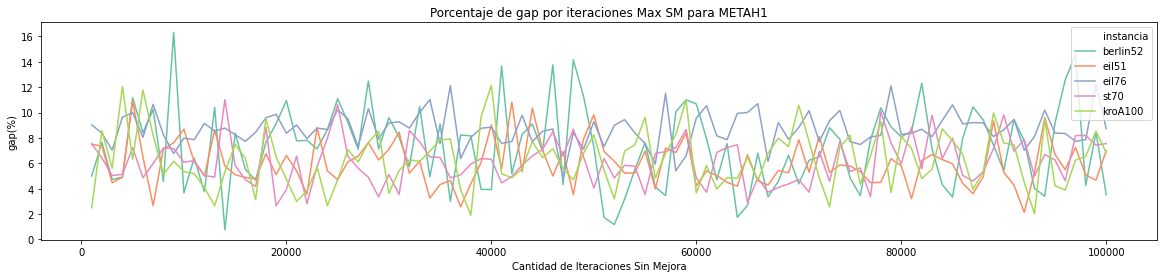

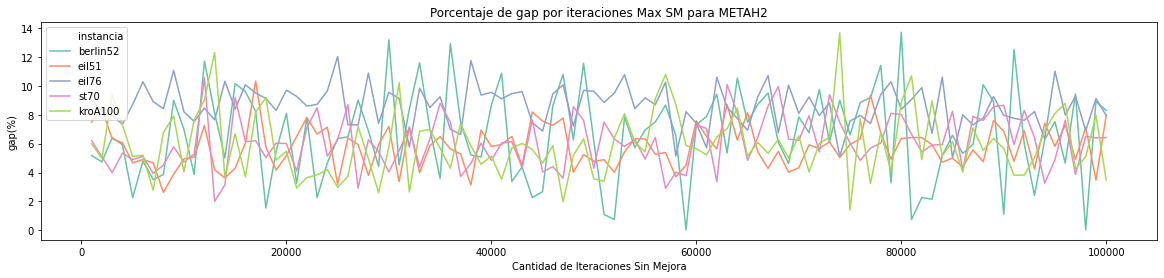

In [219]:
df_maxiter_sm = df_parametros[df_parametros["dataset"]=="maxiter-sm"]
#display(df_maxiter_sm)
for m in df_maxiter_sm['metodo'].unique().tolist():
    #plt.figure();
    plt.figure(figsize=(20, 4))
    graph = sns.lineplot(x="n", y="gap", hue="instancia", 
                        palette="Set2",
                        data=df_maxiter_sm[df_parametros["metodo"]==f'{m}'])
    graph.set(xlabel='Cantidad de Iteraciones Sin Mejora', ylabel='gap(%)');
    #graph._legend.set_title("")
    plt.title(f'Porcentaje de gap por iteraciones Max SM para {m}')
    #graph.set_ylim(100,150);
    plt.savefig(f'graficos/max-iter-sm-gap-{m}.png');

<Figure size 432x288 with 0 Axes>

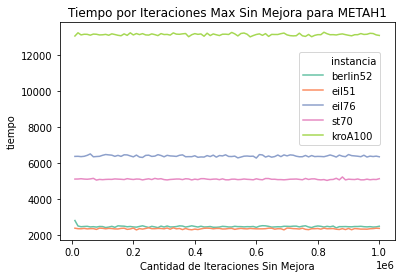

<Figure size 432x288 with 0 Axes>

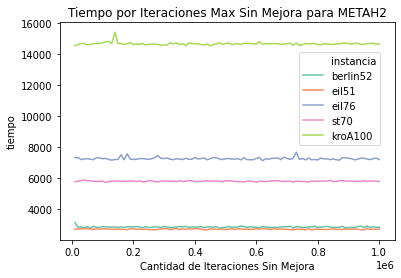

In [220]:
df_maxiter = df_parametros[df_parametros["dataset"]=="maxiter"]
#display(df_maxiter)
for m in df_maxiter['metodo'].unique().tolist():
    plt.figure(); plt.figure();
    fig = sns.lineplot(x="n", y="tiempo", hue="instancia", 
                        palette='Set2',
                        data=df_maxiter[df_parametros["metodo"]==f'{m}'])
    fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.65), ncol=1)
    fig.set(xlabel='Cantidad de Iteraciones Sin Mejora', ylabel='tiempo');
    #fig._legend.set_title("")
    plt.title(f'Tiempo por Iteraciones Max Sin Mejora para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/max-iter-sm-tiempo-{m}.png');

## Maximo tiempo de ejecucion
Evaluamos un rango de tiempo desde 1000 a 30000 milisegundos, manteniendo los otros parame-tros en los valores predeterminados mencionados anteriormente.

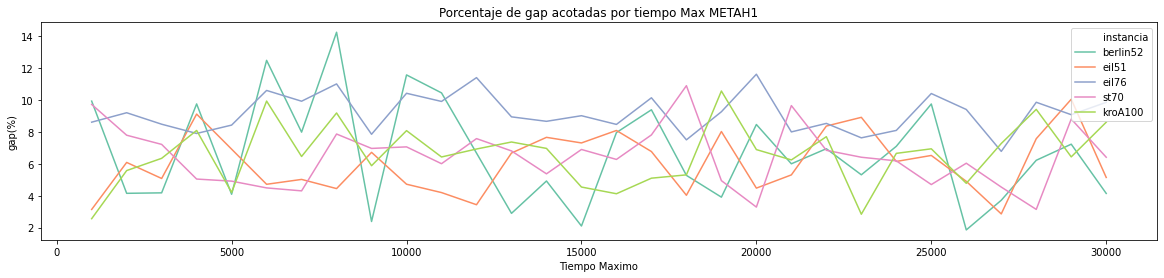

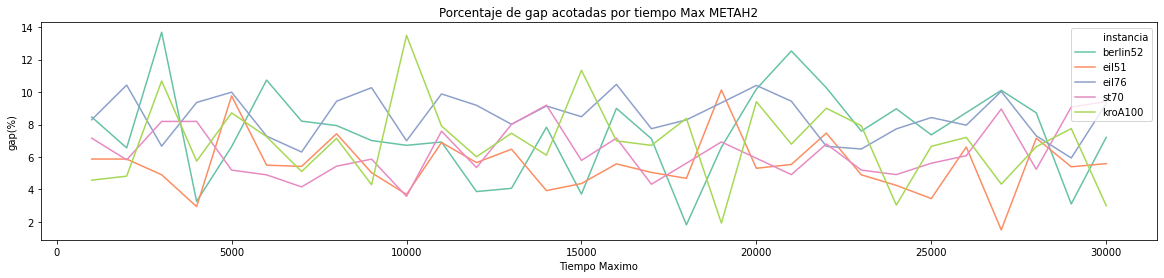

In [221]:
df_maxtiempo = df_parametros[df_parametros["dataset"]=="maxtime"]
#display(df_maxtiempo)
for m in df_maxtiempo['metodo'].unique().tolist():
    #plt.figure();
    plt.figure(figsize=(20, 4))
    graph = sns.lineplot(x="n", y="gap", hue="instancia", 
                        palette="Set2",
                        data=df_maxtiempo[df_parametros["metodo"]==f'{m}'])
    graph.legend(loc='center right', bbox_to_anchor=(1, 0.76), ncol=1)
    graph.set(xlabel='Tiempo Maximo', ylabel='gap(%)');
    #graph._legend.set_title("")
    plt.title(f'Porcentaje de gap acotadas por tiempo Max {m}')
    #graph.set_ylim(100,150);
    plt.savefig(f'graficos/maxtime-gap-{m}.png');

<Figure size 432x288 with 0 Axes>

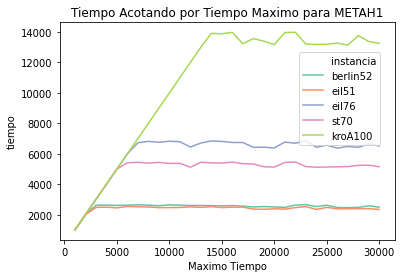

<Figure size 432x288 with 0 Axes>

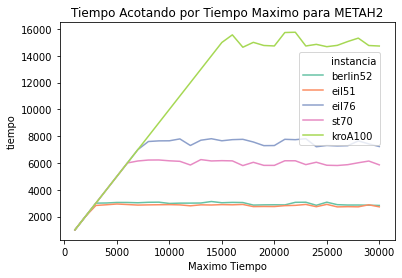

In [222]:
df_maxtiempo = df_parametros[df_parametros["dataset"]=="maxtime"]
#display(df_maxtiempo)
for m in df_maxtiempo['metodo'].unique().tolist():
    plt.figure(); plt.figure();
    fig = sns.lineplot(x="n", y="tiempo", hue="instancia", 
                        palette='Set2',
                        data=df_maxtiempo[df_parametros["metodo"]==f'{m}'])
    fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.65), ncol=1)
    fig.set(xlabel='Maximo Tiempo', ylabel='tiempo');
    #fig._legend.set_title("")
    plt.title(f'Tiempo Acotando por Tiempo Maximo para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/maxtime-tiempo-{m}.png');

## Tamaño de memoria
Evaluamos un rango de tama ̃no de memoria desde 1 a 50  ́ultimas soluciones o aristas, mante-niendo los otros par ́ametros en los valores predeterminados mencionados anteriormente

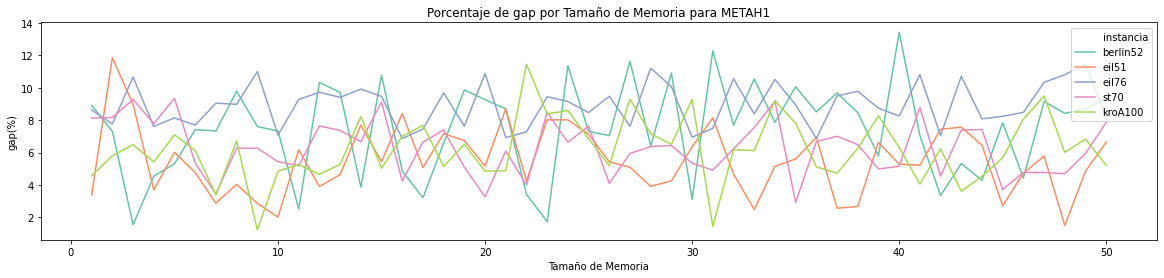

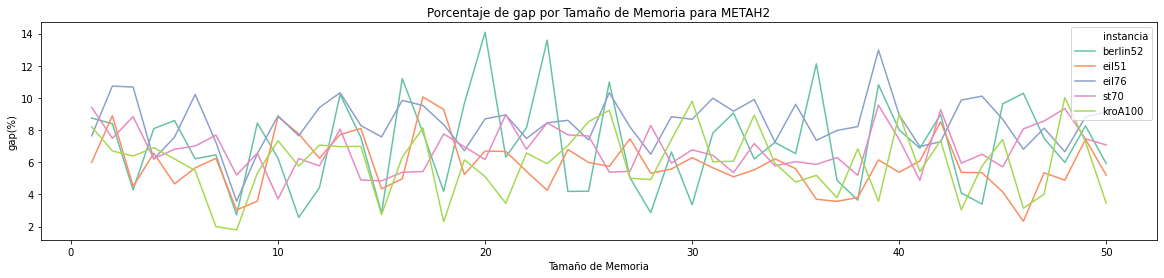

In [223]:
df_memsize = df_parametros[df_parametros["dataset"]=="memsize"]
#display(df_memsize)
for m in df_memsize['metodo'].unique().tolist():
    #plt.figure();
    plt.figure(figsize=(20, 4))
    graph.legend(loc='center right', bbox_to_anchor=(1, 0.76), ncol=1)
    graph = sns.lineplot(x="n", y="gap", hue="instancia", 
                        palette="Set2",
                        data=df_memsize[df_parametros["metodo"]==f'{m}'])
    graph.set(xlabel='Tamaño de Memoria', ylabel='gap(%)');
    #graph._legend.set_title("")
    plt.title(f'Porcentaje de gap por Tamaño de Memoria para {m}')
    #graph.set_ylim(100,150);
    plt.savefig(f'graficos/memsize-gap-{m}.png');

<Figure size 432x288 with 0 Axes>

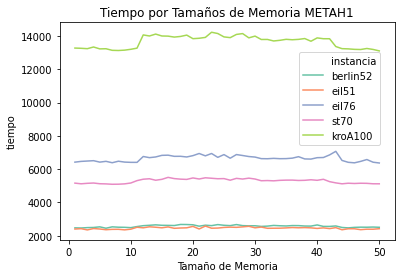

<Figure size 432x288 with 0 Axes>

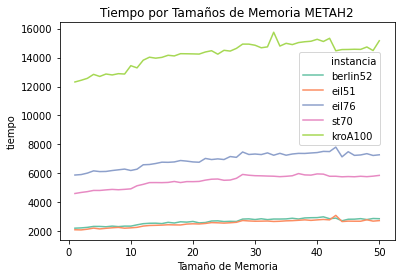

In [224]:
for m in df_memsize['metodo'].unique().tolist():
    plt.figure(); plt.figure();
    fig = sns.lineplot(x="n", y="tiempo", hue="instancia", 
                        palette='Set2',
                        data=df_memsize[df_parametros["metodo"]==f'{m}'])
    fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.65), ncol=1)
    fig.set(xlabel='Tamaño de Memoria', ylabel='tiempo');
    #fig._legend.set_title("")
    plt.title(f'Tiempo por Tamaños de Memoria {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/memsize-tiempo-{m}.png');

## Porcentaje de vecindad
Evaluamos un rango de tama ̃no de vecindad considerada desde 10 % a 50 %, manteniendo los otros paŕametros en los valores predeterminados mencionados anteriormente.

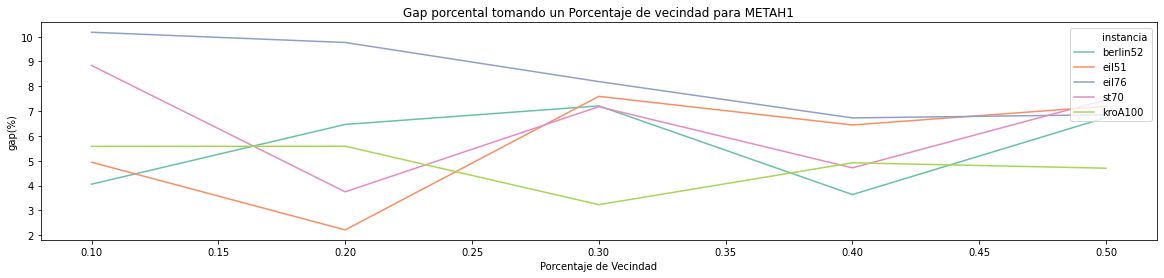

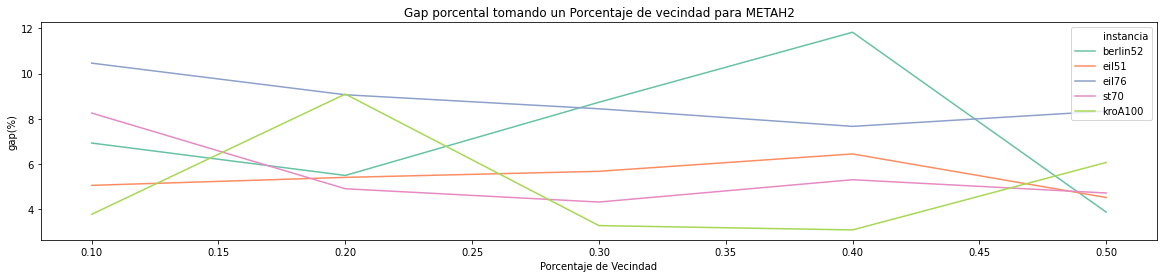

In [225]:
df_vecindad = df_parametros[df_parametros["dataset"]=="porc"]
#display(df_vecindad)
for m in df_vecindad['metodo'].unique().tolist():
    #plt.figure();
    plt.figure(figsize=(20, 4))
    graph.legend(loc='center right', bbox_to_anchor=(1, 0.76), ncol=1)
    graph = sns.lineplot(x="n", y="gap", hue="instancia", 
                        palette="Set2",
                        data=df_vecindad[df_parametros["metodo"]==f'{m}'])
    graph.set(xlabel='Porcentaje de Vecindad', ylabel='gap(%)');
    #graph._legend.set_title("")
    plt.title(f'Gap porcental tomando un Porcentaje de vecindad para {m}')
    #graph.set_ylim(100,150);
    plt.savefig(f'graficos/vecindad-gap-{m}.png');

<Figure size 432x288 with 0 Axes>

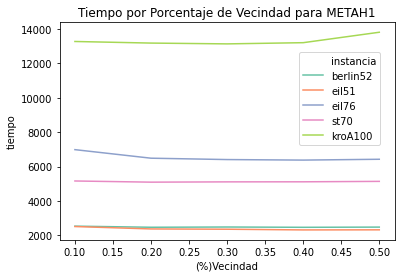

<Figure size 432x288 with 0 Axes>

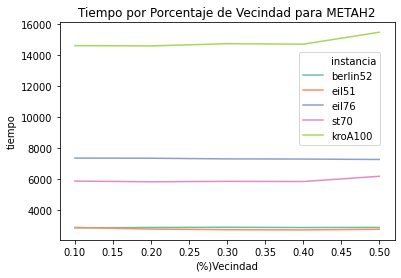

In [226]:
for m in df_vecindad['metodo'].unique().tolist():
    plt.figure(); plt.figure();
    fig = sns.lineplot(x="n", y="tiempo", hue="instancia", 
                        palette='Set2',
                        data=df_vecindad[df_parametros["metodo"]==f'{m}'])
    fig.legend(loc='center left', bbox_to_anchor=(0.7, 0.65), ncol=1)
    fig.set(xlabel='(%)Vecindad', ylabel='tiempo');
    #fig._legend.set_title("")
    plt.title(f'Tiempo por Porcentaje de Vecindad para {m}')
    #fig.set_ylim(100,150);
    plt.savefig(f'graficos/vecindad-tiempo-{m}.png');

## Punto 5 graficos

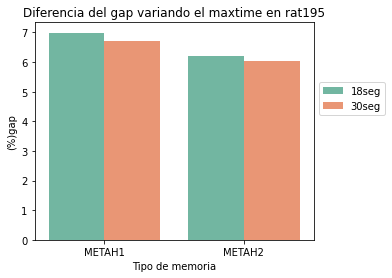

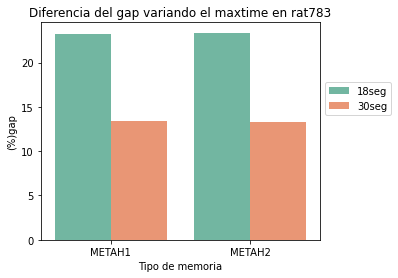

In [52]:
exp_rat = pd.read_csv("resultados/punto5-maxtime-var.csv")
for ins in ["rat195","rat783"]:
    df_rat = exp_rat[exp_rat["instancia"]==f'{ins}'];
    plt.figure(figsize=(5, 4));
    fig = sns.barplot(x="heur", y="gap", hue="tiempo", palette='Set2', data=df_rat)
    fig.set(xlabel='Tipo de memoria', ylabel='(%)gap');
    #fig._legend.set_title("")
    plt.title(f'Diferencia del gap variando el maxtime en {ins}')
    #fig.set_ylim(100,150);
    fig.legend(loc='center left', bbox_to_anchor=(1, 0.65), ncol=1)
    plt.savefig(f'graficos/punto5-{ins}.png');
